# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the laptop dataset

In [2]:
df_laptop = pd.read_csv('laptop_data.csv')

In [3]:
df_laptop

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# Count the number of duplicate rows

df_laptop.duplicated().sum()

0

In [6]:
# Count the number of missing values in each column

df_laptop.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Pre-processing the data

In [7]:
# Drop the 'Unnamed: 0' column and convert 'Ram' and 'Weight' columns

df_laptop.drop(columns=['Unnamed: 0'], inplace=True)
df_laptop['Ram'] = df_laptop['Ram'].str.replace('GB', '').astype('int32')
df_laptop['Weight'] = df_laptop['Weight'].str.replace('kg', '').astype('float32')

In [8]:
df_laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Performing Exploratory Data Analysis

<Axes: xlabel='Price', ylabel='Count'>

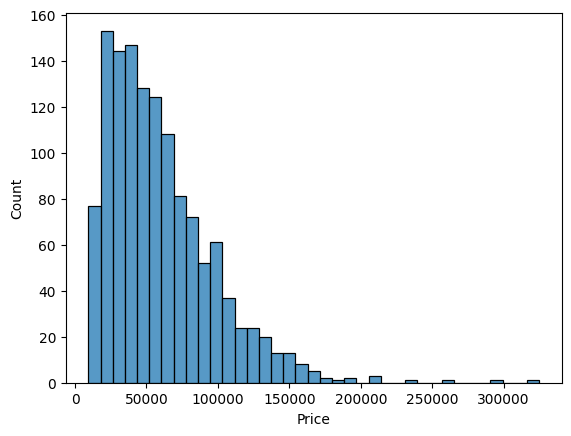

In [10]:
# Generate a histogram plot for the 'Price' column in the DataFrame using Seaborn
sns.histplot(df_laptop['Price'])

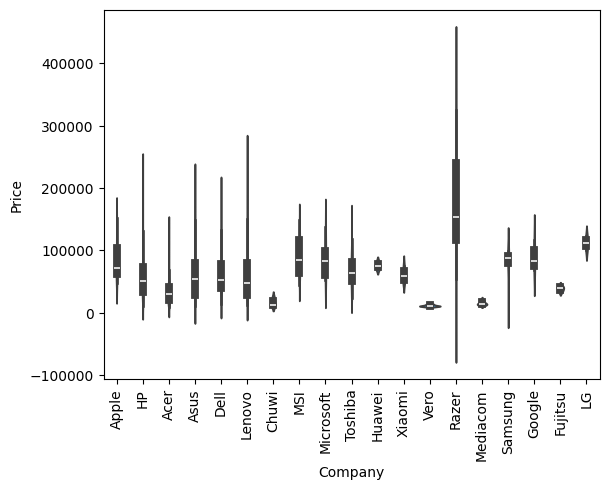

In [11]:
# Create a violin plot to visualize the distribution of laptop prices across different companies
sns.violinplot(x='Company', y='Price', data=df_laptop)

# Rotate the x-axis labels vertically for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

<Axes: >

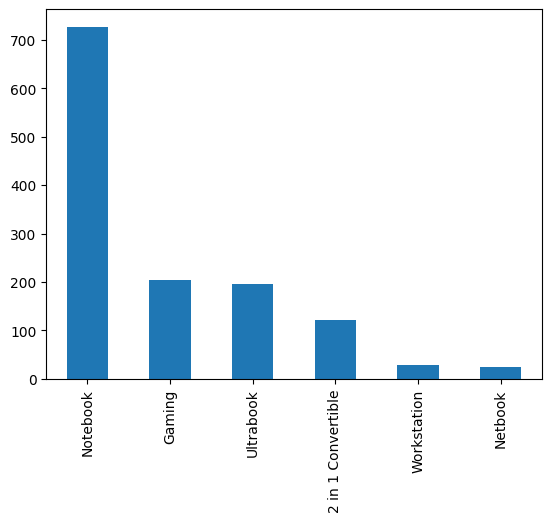

In [12]:
# Create a bar plot to display the count of each laptop type in the 'TypeName' column of the DataFrame.

df_laptop['TypeName'].value_counts().plot.bar()

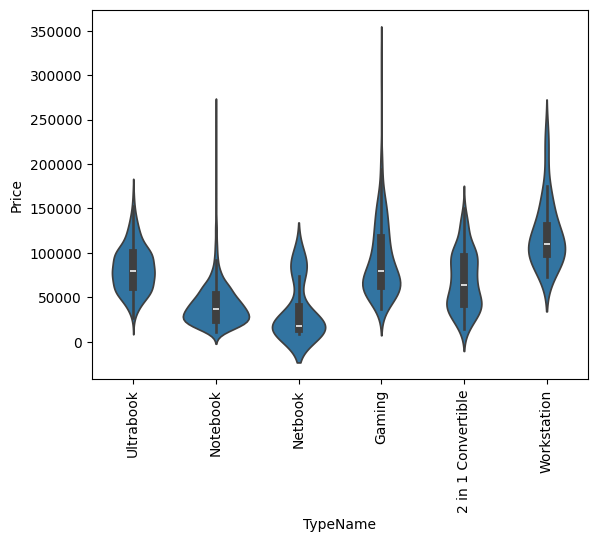

In [13]:
# Generate a violin plot to visualize the distribution of laptop prices based on the laptop types
sns.violinplot(x='TypeName', y='Price', data=df_laptop)

# Rotate the x-axis labels vertically for improved readability.
plt.xticks(rotation=90)

# Display the generated violin plot.
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

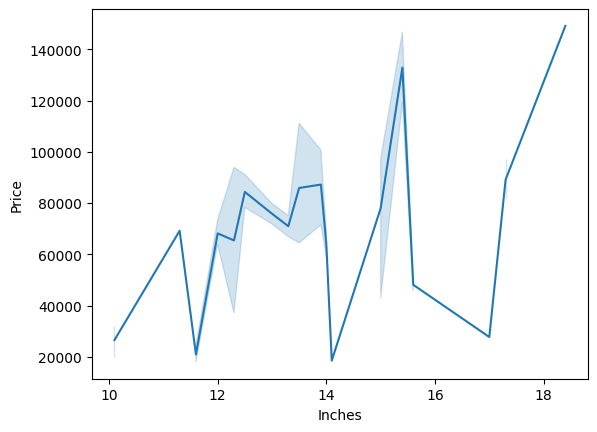

In [14]:
# Line plot: Inches vs Price

sns.lineplot(x=df_laptop['Inches'],y=df_laptop['Price'])

In [15]:
# Count the occurrences of each unique value in the 'ScreenResolution' column of the laptop DataFrame.

df_laptop['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [16]:
# Add a 'Touchscreen Laptop' column, set to 1 for touchscreens and 0 otherwise

df_laptop['Touchscreen Laptop'] = df_laptop['ScreenResolution'].str.contains('Touchscreen').astype(int)

In [17]:
df_laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen Laptop
735,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.85,41505.12,0
184,Xiaomi,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,1.95,63882.72,0
975,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,52161.12,0
924,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,97236.00,1
619,Acer,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,20193.12,1


<Axes: xlabel='Touchscreen Laptop', ylabel='Price'>

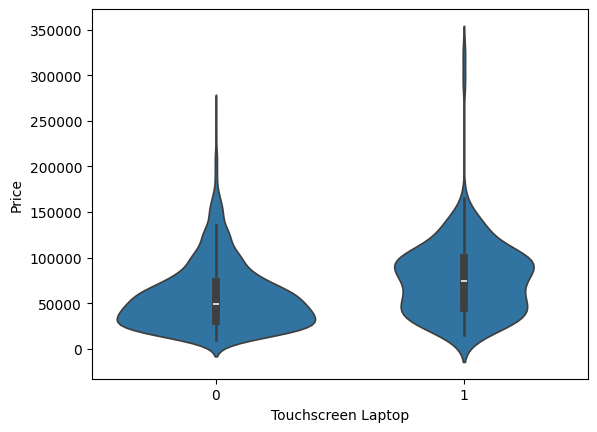

In [18]:
# Generate a violin plot using Seaborn to compare the average prices of Touchscreen and Non-Touchscreen laptops.

sns.violinplot(x=df_laptop['Touchscreen Laptop'],y=df_laptop['Price'])

In [19]:
# Create 'IPS Panel' column indicating the presence of 'IPS Panel' in 'ScreenResolution'

df_laptop['IPS Panel'] = df_laptop['ScreenResolution'].str.contains('IPS Panel').astype(int)

In [20]:
df_laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS Panel', ylabel='Price'>

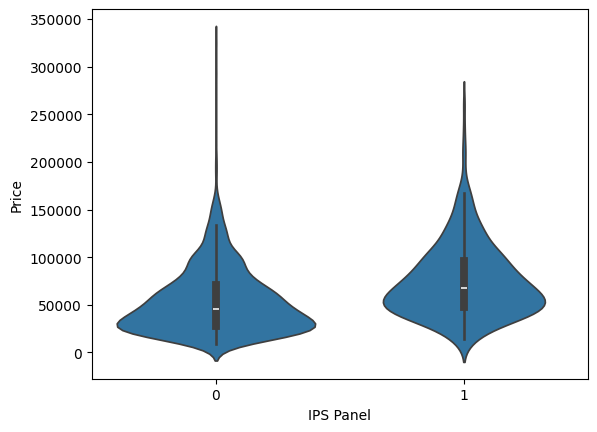

In [21]:
# Generate a violin plot using Seaborn to compare the average prices of laptops with and without IPS Panels.

sns.violinplot(x=df_laptop['IPS Panel'],y=df_laptop['Price'])

In [22]:
# Split 'ScreenResolution' into two columns on 'x'

temp = df_laptop['ScreenResolution'].str.split('x', n=1, expand=True)

In [23]:
# Create 'X_resolution' and 'Y_resolution' columns

df_laptop[['X_resolution', 'Y_resolution']] = temp

In [24]:
df_laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [25]:
# Clean 'X_resolution': remove commas, extract numeric values, and convert to numeric format

df_laptop['X_resolution'] = df_laptop['X_resolution'].str.replace(',', '').str.extract(r'(\d+\.?\d+)')[0]

In [26]:
df_laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [27]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   ScreenResolution    1303 non-null   object 
 4   Cpu                 1303 non-null   object 
 5   Ram                 1303 non-null   int32  
 6   Memory              1303 non-null   object 
 7   Gpu                 1303 non-null   object 
 8   OpSys               1303 non-null   object 
 9   Weight              1303 non-null   float32
 10  Price               1303 non-null   float64
 11  Touchscreen Laptop  1303 non-null   int32  
 12  IPS Panel           1303 non-null   int32  
 13  X_resolution        1303 non-null   object 
 14  Y_resolution        1303 non-null   object 
dtypes: float32(1), float64(2), int32(3), object(9)
memory u

In [28]:
# Convert 'X_resolution' and 'Y_resolution' columns to integer data type

df_laptop[['X_resolution', 'Y_resolution']] = df_laptop[['X_resolution', 'Y_resolution']].astype(int)

In [29]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   ScreenResolution    1303 non-null   object 
 4   Cpu                 1303 non-null   object 
 5   Ram                 1303 non-null   int32  
 6   Memory              1303 non-null   object 
 7   Gpu                 1303 non-null   object 
 8   OpSys               1303 non-null   object 
 9   Weight              1303 non-null   float32
 10  Price               1303 non-null   float64
 11  Touchscreen Laptop  1303 non-null   int32  
 12  IPS Panel           1303 non-null   int32  
 13  X_resolution        1303 non-null   int32  
 14  Y_resolution        1303 non-null   int32  
dtypes: float32(1), float64(2), int32(5), object(7)
memory u

In [30]:
# Calculate the correlation between the 'Price' column and all other columns in the laptop DataFrame.

df_laptop.corr()['Price']

C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\2380341046.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_laptop.corr()['Price']


Inches                0.068197
Ram                   0.743007
Weight                0.210370
Price                 1.000000
Touchscreen Laptop    0.191226
IPS Panel             0.252208
X_resolution          0.556529
Y_resolution          0.552809
Name: Price, dtype: float64

In [31]:
# Calculate and assign Pixels Per Inch (PPI) to 'PPI_Screen'

df_laptop['PPI_Screen'] = (df_laptop['X_resolution']**2 + df_laptop['Y_resolution']**2)**0.5 / df_laptop['Inches']

In [32]:
# Calculate the correlation between the 'Price' column and all other columns in the laptop DataFrame.

df_laptop.corr()['Price']

C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\2380341046.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_laptop.corr()['Price']


Inches                0.068197
Ram                   0.743007
Weight                0.210370
Price                 1.000000
Touchscreen Laptop    0.191226
IPS Panel             0.252208
X_resolution          0.556529
Y_resolution          0.552809
PPI_Screen            0.473487
Name: Price, dtype: float64

In [33]:
# Drop specified columns from the laptop DataFrame in place

df_laptop.drop(columns=['ScreenResolution', 'Inches', 'X_resolution', 'Y_resolution'], inplace=True)

In [34]:
# Count the occurrences of each unique value in the 'Cpu' column of the laptop DataFrame.

df_laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [35]:
# Extract and concatenate the first three words from 'Cpu' to create 'Cpu Name'

df_laptop['Cpu Name'] = df_laptop['Cpu'].str.split().str[:3].str.join(' ')

In [36]:
df_laptop

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


In [37]:
# Define a function to categorize processors

def fetch_processor(text):
    processor_categories = {
        'Intel Core i7': 'Intel Core i7',
        'Intel Core i5': 'Intel Core i5',
        'Intel Core i3': 'Intel Core i3'
    }
    
    return processor_categories.get(text, 'Other Intel Processor' if text.startswith('Intel') else 'AMD Processor')

In [38]:
# Categorize processor brands and create 'Cpu brand' column

df_laptop['Cpu brand'] = df_laptop['Cpu Name'].apply(fetch_processor)

In [39]:
df_laptop

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,Intel Core i7


<Axes: >

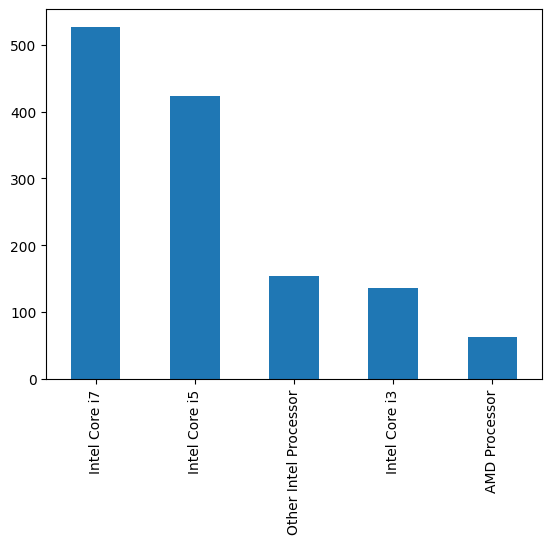

In [40]:
# Visualize distribution of laptop processor brands with a bar chart

df_laptop['Cpu brand'].value_counts().plot.bar()

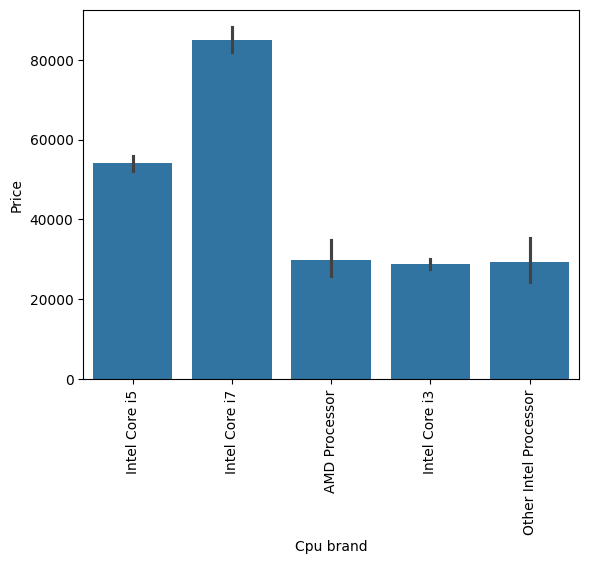

In [41]:
# Create a bar plot using Seaborn to compare the average prices of laptops based on processor brands in the 'Cpu brand' column.
sns.barplot(x=df_laptop['Cpu brand'], y=df_laptop['Price'])

# Rotate the x-axis labels vertically for improved readability.
plt.xticks(rotation='vertical')

# Display the generated bar plot.
plt.show()

In [42]:
# Drop the specified columns ('Cpu' and 'Cpu Name') from the laptop DataFrame in place.

df_laptop.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [43]:
df_laptop

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


<Axes: >

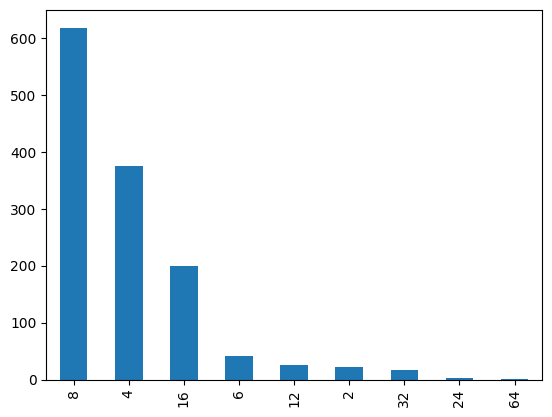

In [44]:
# Generate a bar chart to visualize the distribution of RAM capacities in the 'Ram' column of the laptop DataFrame.

df_laptop['Ram'].value_counts().plot(kind='bar')

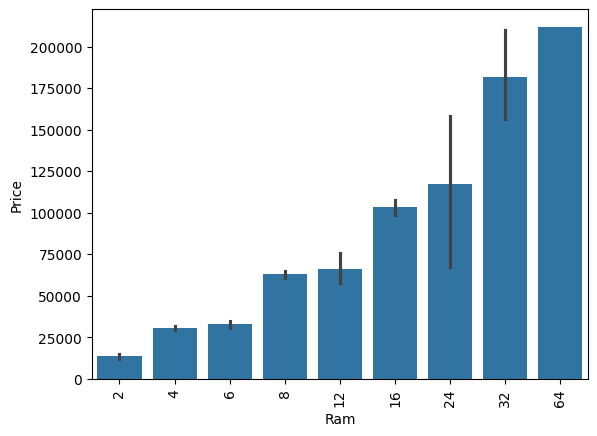

In [45]:
# Create a bar plot using Seaborn to compare the average prices of laptops based on RAM capacities in the 'Ram' column.
sns.barplot(x='Ram', y='Price', data=df_laptop)

# Rotate the x-axis labels vertically for improved readability.
plt.xticks(rotation=90)

# Display the generated bar plot.
plt.show()

In [46]:
# Count the occurrences of each unique value in the 'Memory' column of the laptop DataFrame.

df_laptop['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [47]:
# Refine and split 'Memory' column into two parts
df_laptop['Memory'] = df_laptop['Memory'].astype(str).replace(['\.0', 'GB', 'TB'], ['', '', '000'], regex=True)
memory_layers = df_laptop['Memory'].str.split("+", n=1, expand=True)

# Process the first and second storage layers
df_laptop['storage_layer1'] = memory_layers[0].str.strip()
df_laptop['storage_layer2'] = memory_layers[1].fillna('0').str.strip()

# Initialize binary columns for storage types
for layer, layer_name in zip(['storage_layer1', 'storage_layer2'], ['Layer1', 'Layer2']):
    for storage_type in ['HDD', 'SSD', 'Hybrid', 'Flash Storage']:
        df_laptop[f'{layer_name}{storage_type.replace(" ", "_")}'] = df_laptop[layer].str.contains(storage_type).astype(int)

# Remove non-numeric characters and convert layers to integer
df_laptop['storage_layer1'] = df_laptop['storage_layer1'].str.extract('(\d+)').fillna(0).astype(int)
df_laptop['storage_layer2'] = df_laptop['storage_layer2'].str.extract('(\d+)').fillna(0).astype(int)

# Calculate total storage capacity for each type
for storage_type in ['HDD', 'SSD', 'Hybrid', 'Flash_Storage']:
    df_laptop[storage_type] = df_laptop[f'Layer1{storage_type}'] * df_laptop['storage_layer1'] + df_laptop[f'Layer2{storage_type}'] * df_laptop['storage_layer2']

# Remove temporary and intermediate columns
columns_to_drop = ['storage_layer1', 'storage_layer2'] + [f'{layer}{storage_type.replace(" ", "_")}' for layer in ['Layer1', 'Layer2'] for storage_type in ['HDD', 'SSD', 'Hybrid', 'Flash Storage']]
df_laptop.drop(columns=columns_to_drop, inplace=True)


In [48]:
df_laptop

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [49]:
# Drop the 'Memory' column from the laptop DataFrame in place.

df_laptop.drop(columns=['Memory'], inplace=True)

In [50]:
df_laptop

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [51]:
# Calculate the correlation between the 'Price' column and all other columns in the laptop DataFrame.

df_laptop.corr()['Price']

C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\2380341046.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_laptop.corr()['Price']


Ram                   0.743007
Weight                0.210370
Price                 1.000000
Touchscreen Laptop    0.191226
IPS Panel             0.252208
PPI_Screen            0.473487
HDD                  -0.096441
SSD                   0.670799
Hybrid                0.007989
Flash_Storage        -0.040511
Name: Price, dtype: float64

In [52]:
# Drop the 'Hybrid' and 'Flash_Storage' columns from the laptop DataFrame in place.

df_laptop.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [53]:
df_laptop

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0


In [54]:
# Count the occurrences of each unique value in the 'Gpu' column of the laptop DataFrame.

df_laptop['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [55]:
# Create a new column 'Gpu brand' in the laptop DataFrame based on the first word of each entry in the 'Gpu' column.

df_laptop['Gpu brand'] = df_laptop['Gpu'].apply(lambda x: x.split()[0])

In [56]:
df_laptop

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


In [57]:
# Count the occurrences of each unique value in the 'Gpu' column of the laptop DataFrame.

df_laptop['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [58]:
# Remove rows where 'Gpu brand' is 'ARM' and count occurrences of each 'Gpu brand'

df_laptop = df_laptop[df_laptop['Gpu brand'] != 'ARM']
gpu_brand_counts = df_laptop['Gpu brand'].value_counts()

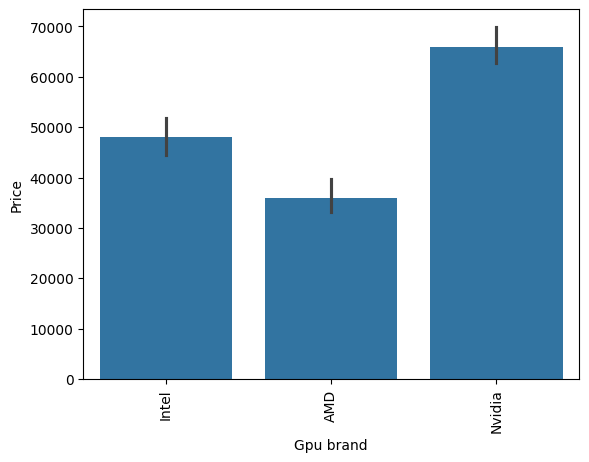

In [59]:
# Create a vertical bar plot for median laptop prices by GPU brand
sns.barplot(x='Gpu brand', y='Price', data=df_laptop, estimator=np.median)

# Rotate the x-axis labels vertically for improved readability.
plt.xticks(rotation=90)

# Dsiplay the generated bar plot
plt.show()

In [60]:
# Drop the 'Gpu' column from the laptop DataFrame in place.

df_laptop.drop(columns=['Gpu'], inplace=True)

C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\848174899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laptop.drop(columns=['Gpu'], inplace=True)


In [61]:
df_laptop

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


In [62]:
# Count the occurrences of each unique value in the 'OpSys' column of the laptop DataFrame.

df_laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [63]:
# Define a function to categorize operating systems into broader groups

def cat_os(inp):
    os_mapping = {
        'Windows 10': 'Windows',
        'Windows 7': 'Windows',
        'Windows 10 S': 'Windows',
        'macOS': 'Mac',
        'Mac OS X': 'Mac'
    }

    return os_mapping.get(inp, 'Others/No OS/Linux')

In [64]:
# Categorize operating systems and create 'os' column

df_laptop['os'] = df_laptop['OpSys'].apply(cat_os)

C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\1173267001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laptop['os'] = df_laptop['OpSys'].apply(cat_os)


In [65]:
# Drop the 'OpSys' column from the laptop DataFrame in place.

df_laptop.drop(columns=['OpSys'], inplace=True)

C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\2691697618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laptop.drop(columns=['OpSys'], inplace=True)


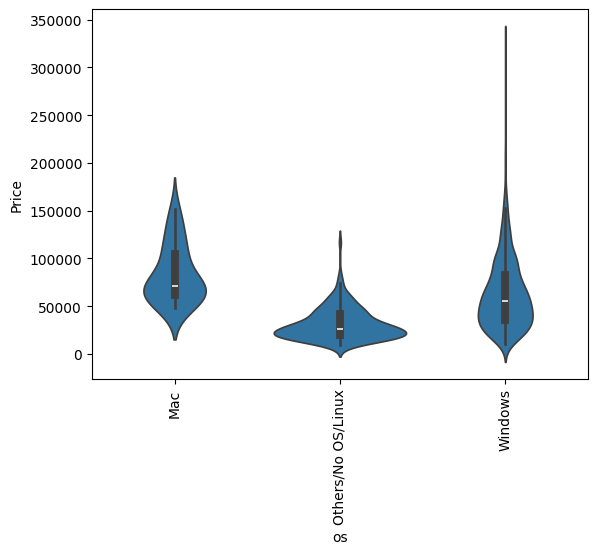

In [66]:
# Generate a violin plot using Seaborn to visualize the relationship between different operating systems ('os') and their corresponding average prices in the laptop DataFrame.
sns.violinplot(x='os', y='Price', data=df_laptop)

# Rotate the x-axis labels vertically for improved readability.
plt.xticks(rotation=90)

# Display the generated violin plot.
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

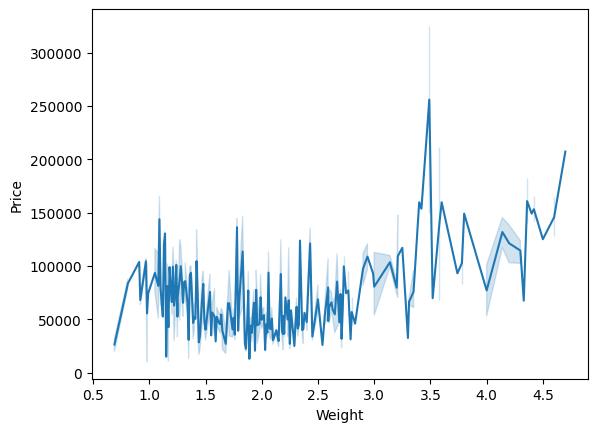

In [67]:
# Line plot: Weight vs Price

sns.lineplot(x=df_laptop['Weight'],y=df_laptop['Price'])

In [68]:
# Calculate the correlation between the 'Price' column and all other columns in the laptop DataFrame.

df_laptop.corr()['Price']

C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\2380341046.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_laptop.corr()['Price']


Ram                   0.742905
Weight                0.209867
Price                 1.000000
Touchscreen Laptop    0.192917
IPS Panel             0.253320
PPI_Screen            0.475368
HDD                  -0.096891
SSD                   0.670660
Name: Price, dtype: float64

C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\3385926457.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_laptop.corr())


<Axes: >

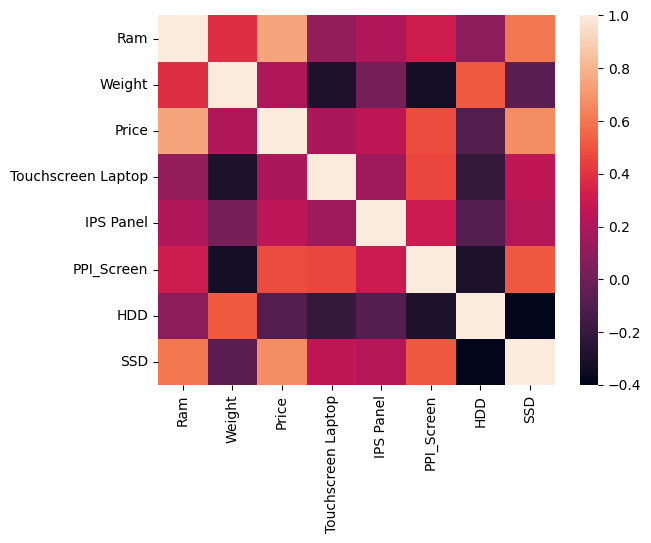

In [69]:
# Generate a heatmap using Seaborn to visualize the correlation matrix of the columns in the laptop DataFrame.

sns.heatmap(df_laptop.corr())

<Axes: ylabel='Price'>

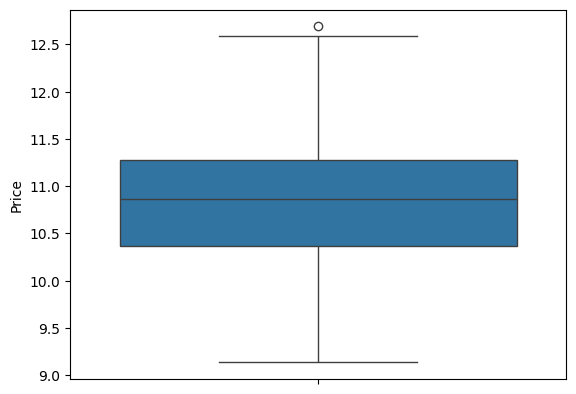

In [70]:
# Boxplot: Log-transformed Price

sns.boxplot(np.log(df_laptop['Price']))

In [71]:
# Prepare features and target for modeling
X = df_laptop.drop(columns=['Price'])
y = np.log(df_laptop['Price'])

# Display the features (X) DataFrame.
X

,Company,TypeName,Ram,Weight,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [72]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

# Splitting the data into testing and training

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [74]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


# Pipeline Construction and executing different machine learning algorithms

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear Regression

In [76]:
# Define the data preprocessing step for categorical and numerical features
def create_preprocessing_pipeline(categorical_features, drop_first=False):
    # Applying OneHotEncoding to categorical features and pass through numerical features
    return ColumnTransformer(
        transformers=[
            ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first' if drop_first else None), categorical_features)
        ],
        remainder='passthrough'
    )

# Define the regression model
def linear_regression_model():
    return LinearRegression()

# Combine preprocessing and model steps into a pipeline
def create_regression_pipeline(preprocessor, regressor):
    return Pipeline([
        ('preprocessing', preprocessor),
        ('regression', regressor)
    ])

# Categorical features to encode
categorical_columns = [0, 1, 7, 10, 11]

# Creating the pipeline
preprocessor = create_preprocessing_pipeline(categorical_columns, drop_first=True)
regressor = linear_regression_model()
pipeline = create_regression_pipeline(preprocessor, regressor)

# Fitting the model
pipeline.fit(X_train, y_train)

# Making predictions
predictions = pipeline.predict(X_test)

# Evaluating the model
r2_score1 = r2_score(y_test, predictions)
mae1 = mean_absolute_error(y_test, predictions)

print(f'R2 accuracy of the model is {r2_score1}')
print(f'Value of Mean Absolute Error is {mae1}')

R2 accuracy of the model is 0.8073277448418661
Value of Mean Absolute Error is 0.21017827976428746


C:\Users\ssisodi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# KNN

In [77]:
# Function to create a preprocessing pipeline for one-hot encoding categorical columns
def create_preprocessor(categorical_columns):
    return ColumnTransformer(transformers=[
        ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ], remainder='passthrough')

# Function to create and return a K-Nearest Neighbors Regressor
def create_knn_regressor(n_neighbors):
    return KNeighborsRegressor(n_neighbors=n_neighbors)

# Function to build and return the complete pipeline
def build_pipeline(preprocessor, model):
    return Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

# Categorical columns to be one-hot encoded
categorical_features = [0, 1, 7, 10, 11]

# Creating the preprocessing and model steps
preprocessor = create_preprocessor(categorical_features)
knn_regressor = create_knn_regressor(n_neighbors=3)

# Assembling the pipeline
pipeline = build_pipeline(preprocessor, knn_regressor)

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions on the test set
predictions = pipeline.predict(X_test)

# Evaluating the model
r2_score2 = r2_score(y_test, predictions)
mae2 = mean_absolute_error(y_test, predictions)

print(f'R2 accuracy of the model is {r2_score2}')
print(f'Value of Mean Absolute Error is {mae2}')

R2 accuracy of the model is 0.803148868705085
Value of Mean Absolute Error is 0.19264883332948868


C:\Users\ssisodi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Decision Tree

In [78]:
def create_column_transformer(transformer_list, remainder_option='passthrough'):
    """Create and return a ColumnTransformer."""
    return ColumnTransformer(transformers=transformer_list, remainder=remainder_option)

def create_decision_tree_regressor():
    """Create and return a Decision Tree Regressor."""
    return DecisionTreeRegressor()

def create_pipeline(transformer, model):
    """Create and return a pipeline combining a transformer and a model."""
    return Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

# Define columns for one-hot encoding and create the ColumnTransformer
one_hot_columns = [0, 1, 7, 10, 11]
column_transformer = create_column_transformer([
    ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'), one_hot_columns)
])

# Create the Decision Tree Regressor
decision_tree_model = create_decision_tree_regressor()

# Assemble the pipeline
model_pipeline = create_pipeline(column_transformer, decision_tree_model)

# Training the model
model_pipeline.fit(X_train, y_train)

# Making predictions on the test set
predictions = model_pipeline.predict(X_test)

# Evaluate the model
r2_score3 = r2_score(y_test, predictions)
mae3 = mean_absolute_error(y_test, predictions)

print(f'R2 accuracy of the model is {r2_score3}')
print(f'Value of Mean Absolute Error is {mae3}')

R2 accuracy of the model is 0.8133559244857238
Value of Mean Absolute Error is 0.19553778070808087


C:\Users\ssisodi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Random Forest

In [79]:
def configure_one_hot_encoder(features_to_encode):
    """Configure a ColumnTransformer for one-hot encoding of specified features."""
    return ColumnTransformer(
        transformers=[
            ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'), features_to_encode)
        ], 
        remainder='passthrough'
    )

def configure_random_forest_regressor(n_estimators, random_state, max_samples, max_features, max_depth):
    """Configure a Random Forest Regressor with specified hyperparameters."""
    return RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=random_state,
        max_samples=max_samples,
        max_features=max_features,
        max_depth=max_depth
    )

def create_model_pipeline(column_transformer, model):
    """Create a pipeline that combines a column transformer and a regression model."""
    return Pipeline([
        ('transformer', column_transformer),
        ('regression_model', model)
    ])

# Columns to be one-hot encoded
categorical_columns = [0, 1, 7, 10, 11]

# Configuring the transformer and the regression model
transformer = configure_one_hot_encoder(categorical_columns)
random_forest_model = configure_random_forest_regressor(100, 3, 0.5, 0.75, 15)

# Creating the pipeline
pipeline = create_model_pipeline(transformer, random_forest_model)

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions
predictions = pipeline.predict(X_test)

# Evaluating the model
r2_score4 = r2_score(y_test, predictions)
mae4 = mean_absolute_error(y_test, predictions)

print(f'R2 accuracy of the model is {r2_score4}')
print(f'Value of Mean Absolute Error is {mae4}')

C:\Users\ssisodi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 accuracy of the model is 0.8873402378382488
Value of Mean Absolute Error is 0.15860130110457718


# Visualization of Model Performance Comparison

C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\2962209263.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Accuracy', data=df, palette='viridis')
C:\Users\ssisodi3\AppData\Local\Temp\ipykernel_16548\2962209263.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=df, palette='magma')


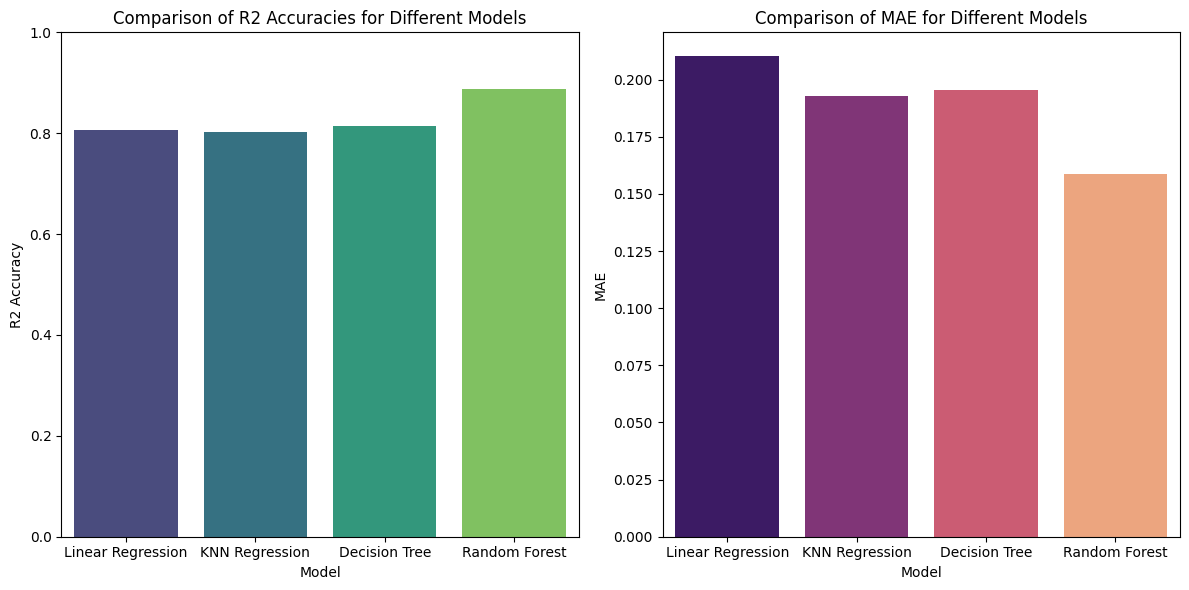

In [80]:
# Create a DataFrame for plotting
model_names = ['Linear Regression', 'KNN Regression', 'Decision Tree', 'Random Forest']
df = pd.DataFrame({'Model': model_names,
                   'R2 Accuracy': [r2_score1, r2_score2, r2_score3, r2_score4],
                   'MAE': [mae1, mae2, mae3, mae4]})

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot Grouped Bar for R2 Accuracies
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R2 Accuracy', data=df, palette='viridis')
plt.title('Comparison of R2 Accuracies for Different Models')
plt.ylim(0, 1)  # Set the y-axis limit to match R2 range

# Plot Grouped Bar for MAE values
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MAE', data=df, palette='magma')
plt.title('Comparison of MAE for Different Models')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# We can see that Random Forest has highest R2 accuracy and least MAE

# Exporting the model

In [81]:
import pickle

# Save the 'df_laptop' DataFrame to a pickle file.
pickle.dump(df_laptop, open('laptop.pkl', 'wb'))

# Save the trained pipeline ('pipeline') to a pickle file.
pickle.dump(pipeline, open('pipeline.pkl', 'wb'))

In [82]:
df_laptop

,Company,TypeName,Ram,Weight,Price,Touchscreen Laptop,IPS Panel,PPI_Screen,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows
